# Analisis Tren dan Pola Kualitas Udara di Enam Kota Global Tahun 2023

Mengakses API Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naufallwcksn","key":"eccaae788426e109cd12d8177e64adb3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d youssefelebiary/global-air-quality-2023-6-cities --quiet
!unzip global-air-quality-2023-6-cities.zip

Dataset URL: https://www.kaggle.com/datasets/youssefelebiary/global-air-quality-2023-6-cities
License(s): MIT
Archive:  global-air-quality-2023-6-cities.zip
  inflating: Air_Quality.csv         
  inflating: Brasilia_Air_Quality.csv  
  inflating: Cairo_Air_Quality.csv   
  inflating: Dubai_Air_Quality.csv   
  inflating: London_Air_Quality.csv  
  inflating: New_York_Air_Quality.csv  
  inflating: Sydney_Air_Quality.csv  


Mengimport Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Membaca dataset .csv

In [ ]:
df = pd.read_csv("Air_Quality.csv")
print(df.shape)
df.head()

(52560, 9)


,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999


Mengecek apakah perlu dilakukan data cleansing

In [ ]:
df['City'].unique()

array(['Brasilia', 'Cairo', 'Dubai', 'London', 'New York', 'Sydney'],
      dtype=object)

In [ ]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Date,0
City,0
CO,0
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


\Menghitung Rata-rata mingguan polutan pada setiap kota

In [ ]:
# Konversi kolom tanggal jadi datetime
df["Date"] = pd.to_datetime(df["Date"])

# Tambahkan kolom bulan
df["Month"] = df["Date"].dt.to_period("M").astype(str)

# Hitung rata-rata PM2.5 per bulan per kota
monthly_avg = df.groupby(["Month", "City"])[["CO", "NO2", "SO2", "O3", "PM2.5", "PM10", "AQI"]].mean().reset_index()

/tmp/ipython-input-6-1721560192.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Month"] = df["Date"].dt.to_period("M").astype(str)


Memvisualisasikan polutan pada setiap kota

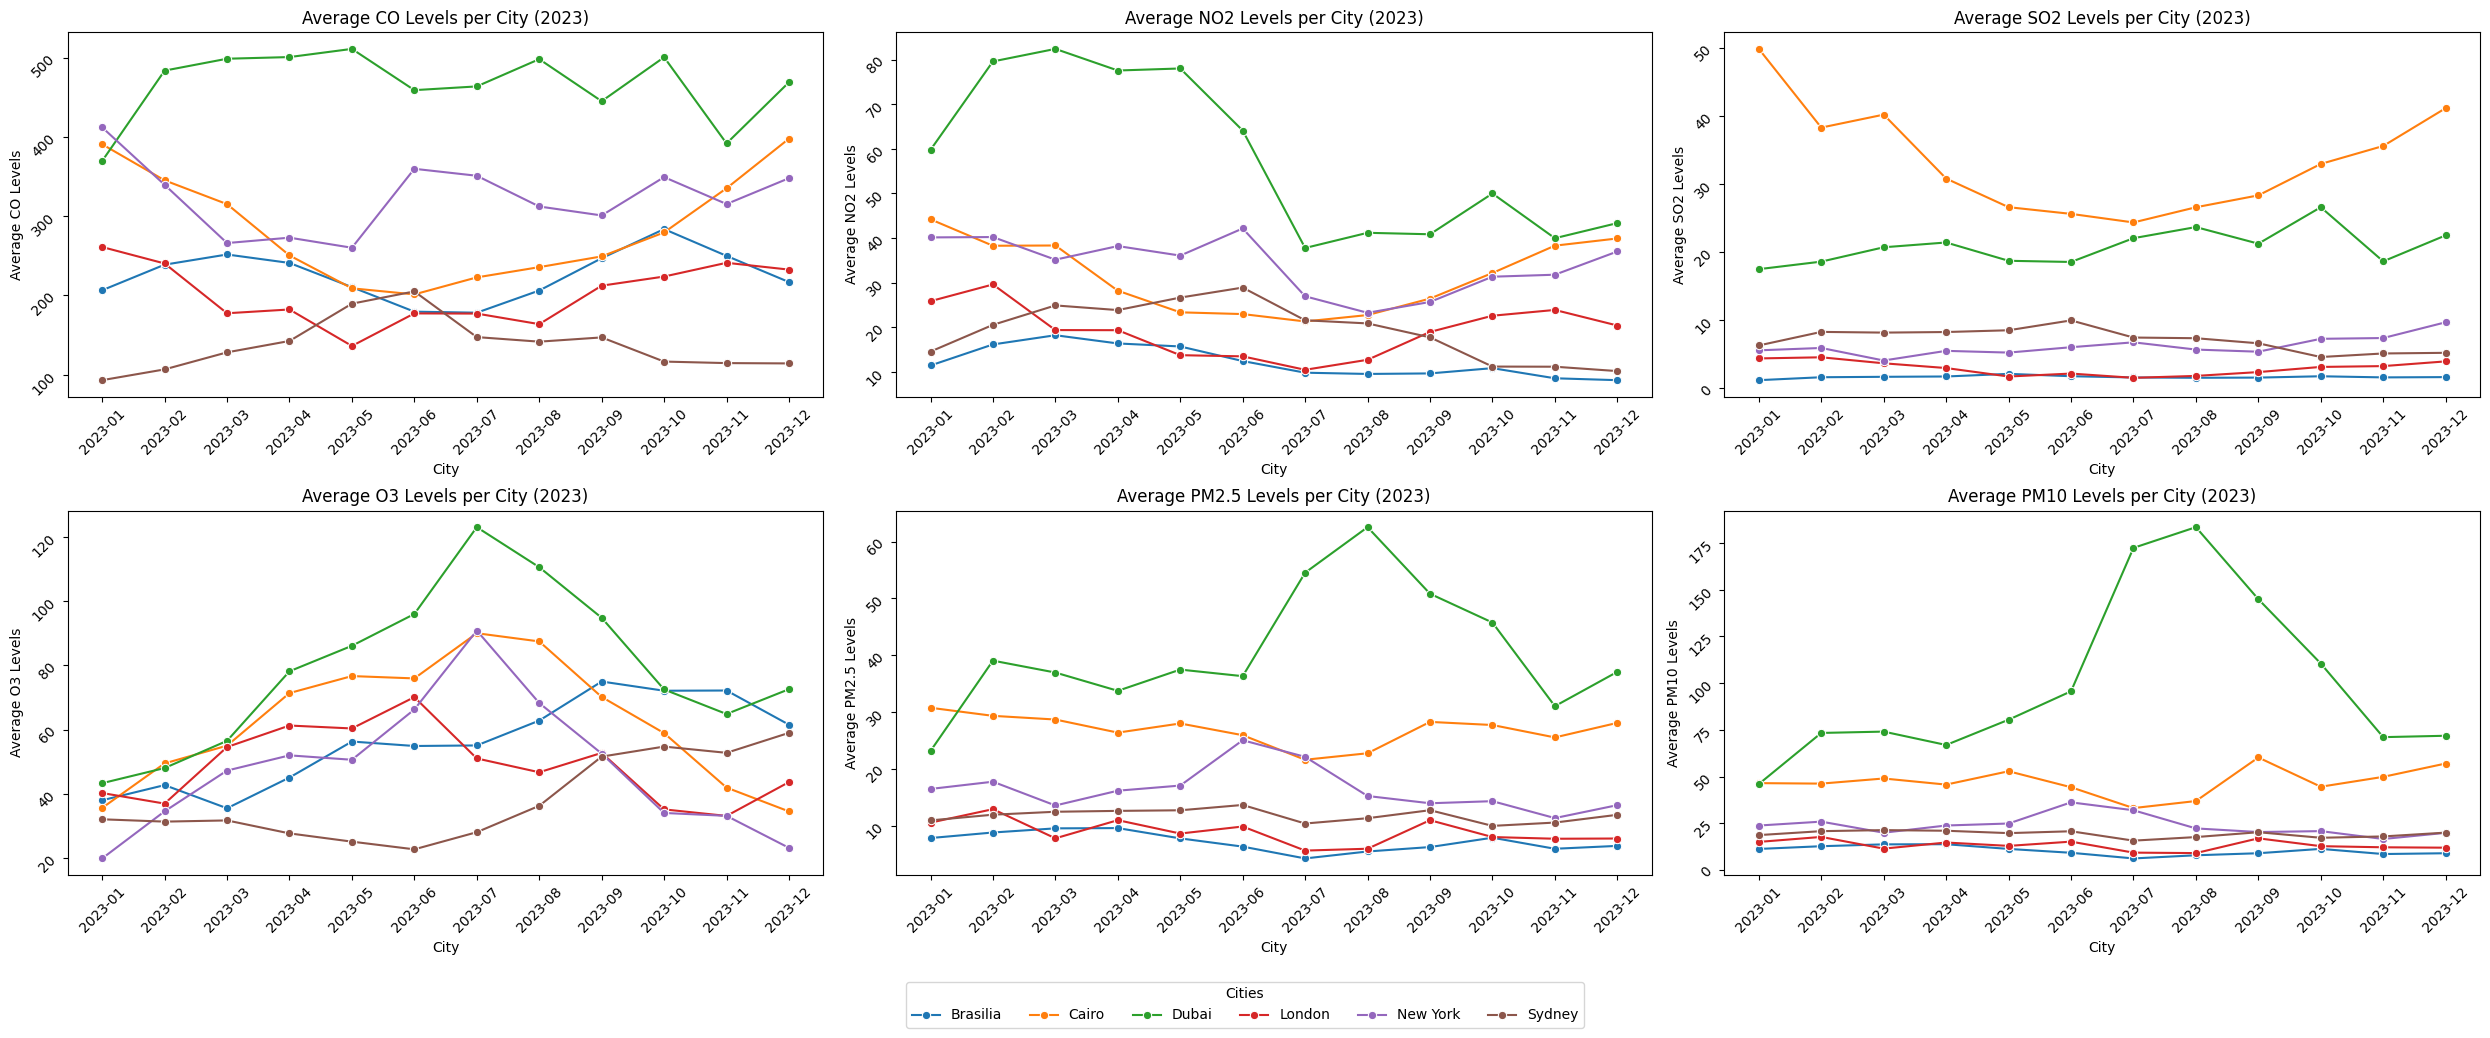

In [ ]:
# Membuat subplot dengan 2 baris dan 2 kolom (2x2 grid)
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

# Grafik CO (kiri atas)
sns.lineplot(data=monthly_avg, x="Month", y="CO", hue="City", marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Average CO Levels per City (2023)')
axes[0, 0].set_xlabel("City")
axes[0, 0].set_ylabel("Average CO Levels")
axes[0, 0].tick_params(rotation=45)

# Menyimpan handles dan labels untuk legenda global
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend().set_visible(False)

# Grafik NO2 (Tengah atas)
sns.lineplot(data=monthly_avg, x="Month", y="NO2", hue="City", marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Average NO2 Levels per City (2023)')
axes[0, 1].set_xlabel("City")
axes[0, 1].set_ylabel("Average NO2 Levels")
axes[0, 1].tick_params(rotation=45)

# Menyimpan handles dan labels untuk legenda global
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend().set_visible(False)

# Grafik SO2 (kanan atas)
sns.lineplot(data=monthly_avg, x="Month", y="SO2", hue="City", marker='o', ax=axes[0, 2])
axes[0, 2].set_title('Average SO2 Levels per City (2023)')
axes[0, 2].set_xlabel("City")
axes[0, 2].set_ylabel("Average SO2 Levels")
axes[0, 2].tick_params(rotation=45)

# Menyimpan handles dan labels untuk legenda global
handles, labels = axes[0, 2].get_legend_handles_labels()
axes[0, 2].legend().set_visible(False)

# Grafik O3 (kiri bawah)
sns.lineplot(data=monthly_avg, x="Month", y="O3", hue="City", marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Average O3 Levels per City (2023)')
axes[1, 0].set_xlabel("City")
axes[1, 0].set_ylabel("Average O3 Levels")
axes[1, 0].tick_params(rotation=45)

# Menyimpan handles dan labels untuk legenda global
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1, 0].legend().set_visible(False)

# Grafik PM2.5 (Tengah bawah)
sns.lineplot(data=monthly_avg, x="Month", y="PM2.5", hue="City", marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Average PM2.5 Levels per City (2023)')
axes[1, 1].set_xlabel("City")
axes[1, 1].set_ylabel("Average PM2.5 Levels")
axes[1, 1].tick_params(rotation=45)

# Menyimpan handles dan labels untuk legenda global
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend().set_visible(False)

# Grafik PM10 (kanan bawah)
sns.lineplot(data=monthly_avg, x="Month", y="PM10", hue="City", marker='o', ax=axes[1, 2])
axes[1, 2].set_title('Average PM10 Levels per City (2023)')
axes[1, 2].set_xlabel("City")
axes[1, 2].set_ylabel("Average PM10 Levels")
axes[1, 2].tick_params(rotation=45)

# Menyimpan handles dan labels untuk legenda global
handles, labels = axes[1, 2].get_legend_handles_labels()
axes[1, 2].legend().set_visible(False)

# Membuat legenda global di bawah semua grafik (horizontal)
fig.legend(handles, labels,
          loc='upper center',
          bbox_to_anchor=(0.5, 0.02),
          ncol=len(labels),  # Semua legenda dalam satu baris
          fontsize='medium',
          title='Cities')

# Mengatur layout agar tidak overlap
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Memberikan ruang di bawah untuk legenda
plt.show()

fig.savefig("Average_polutant_per_Month_(2023).png", dpi=300, bbox_inches='tight')

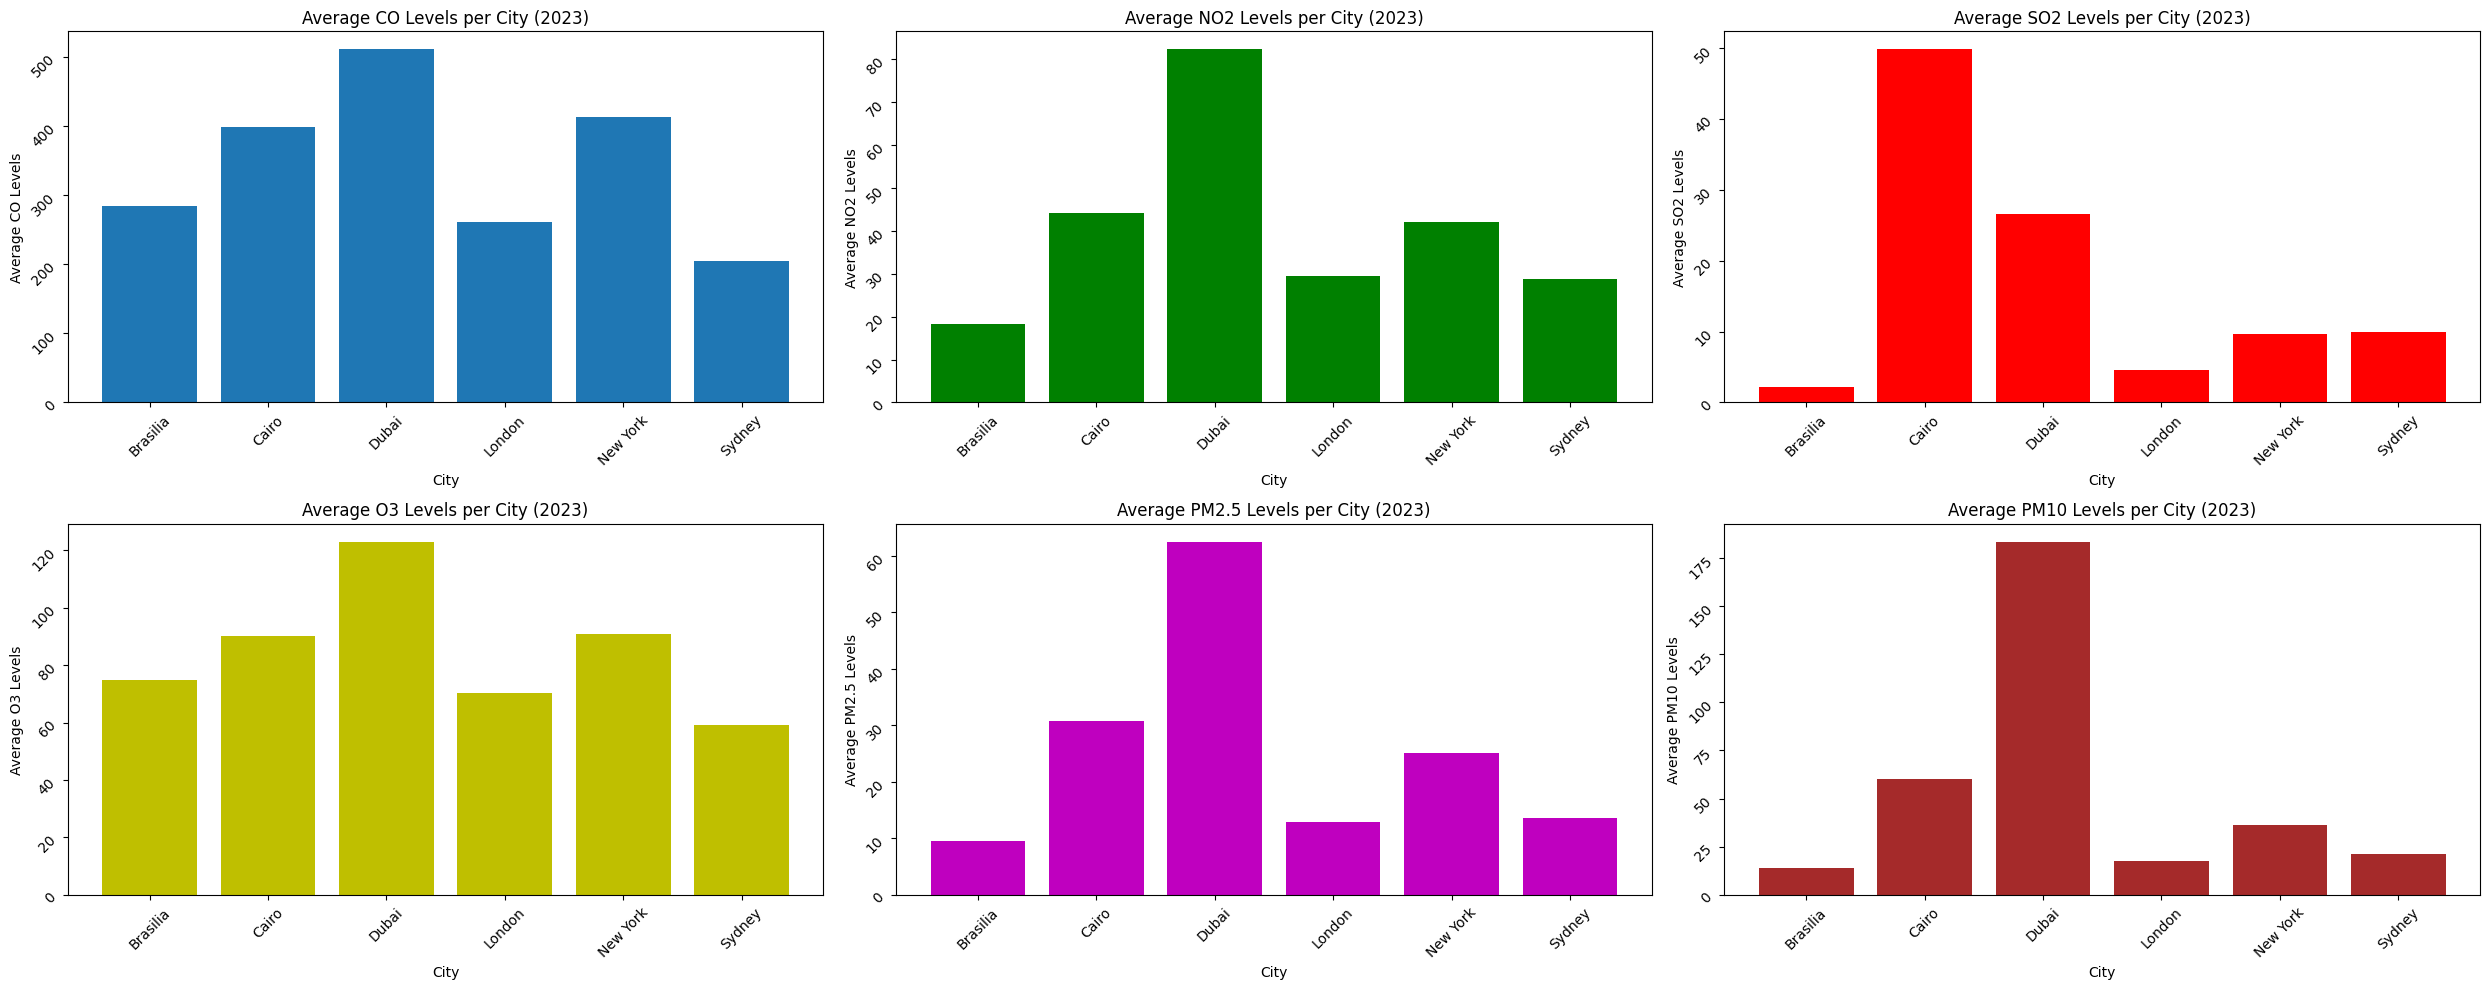

In [ ]:
# Membuat subplot dengan 2 baris dan 2 kolom (2x2 grid)
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

# Grafik CO (kiri atas)
axes[0, 0].bar(monthly_avg["City"], monthly_avg["CO"])
axes[0, 0].set_title('Average CO Levels per City (2023)')
axes[0, 0].set_xlabel("City")
axes[0, 0].set_ylabel("Average CO Levels")
axes[0, 0].tick_params(rotation=45)

# Grafik NO2 (Tengah atas)
axes[0, 1].bar(monthly_avg["City"], monthly_avg["NO2"], color='g')
axes[0, 1].set_title('Average NO2 Levels per City (2023)')
axes[0, 1].set_xlabel("City")
axes[0, 1].set_ylabel("Average NO2 Levels")
axes[0, 1].tick_params(rotation=45)

# Grafik SO2 (kanan atas)
axes[0, 2].bar(monthly_avg["City"], monthly_avg["SO2"], color='r')
axes[0, 2].set_title('Average SO2 Levels per City (2023)')
axes[0, 2].set_xlabel("City")
axes[0, 2].set_ylabel("Average SO2 Levels")
axes[0, 2].tick_params(rotation=45)

# Grafik O3 (kiri bawah)
axes[1, 0].bar(monthly_avg["City"], monthly_avg["O3"], color='y')
axes[1, 0].set_title('Average O3 Levels per City (2023)')
axes[1, 0].set_xlabel("City")
axes[1, 0].set_ylabel("Average O3 Levels")
axes[1, 0].tick_params(rotation=45)

# Grafik PM2.5 (Tengah bawah)
axes[1, 1].bar(monthly_avg["City"], monthly_avg["PM2.5"], color='m')
axes[1, 1].set_title('Average PM2.5 Levels per City (2023)')
axes[1, 1].set_xlabel("City")
axes[1, 1].set_ylabel("Average PM2.5 Levels")
axes[1, 1].tick_params(rotation=45)

# Grafik PM10 (kanan bawah)
axes[1, 2].bar(monthly_avg["City"], monthly_avg["PM10"], color='brown')
axes[1, 2].set_title('Average PM10 Levels per City (2023)')
axes[1, 2].set_xlabel("City")
axes[1, 2].set_ylabel("Average PM10 Levels")
axes[1, 2].tick_params(rotation=45)

# Mengatur layout agar tidak overlap
plt.tight_layout()
plt.show()

fig.savefig("Average_polutant_per_City_(2023).png", dpi=300, bbox_inches='tight')

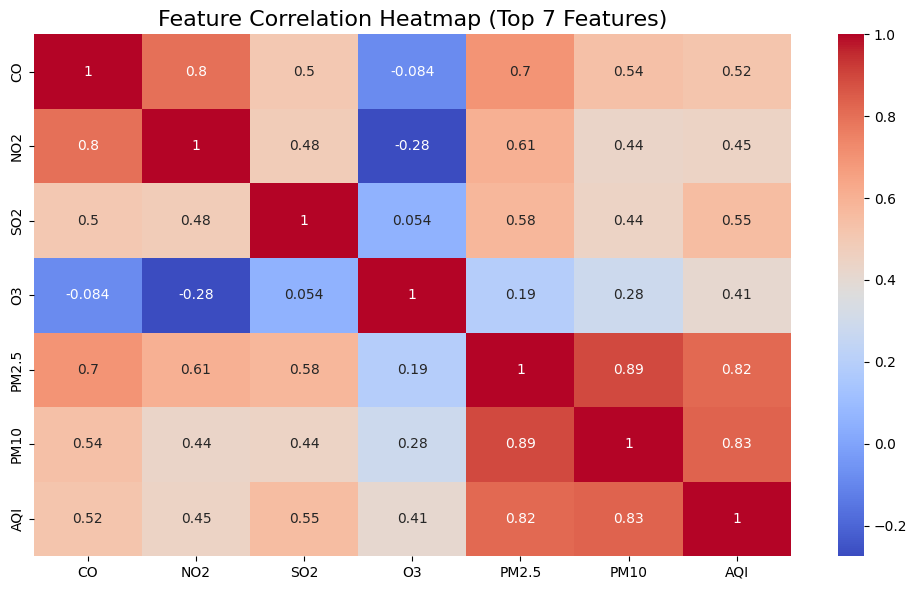

In [ ]:
corr = df[["CO", "NO2", "SO2", "O3", "PM2.5", "PM10", "AQI"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title('Feature Correlation Heatmap (Top 7 Features)', fontsize=16)
plt.tight_layout()
plt.savefig("Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
